In [12]:
import pandas as pd # For loading csv file data to numpy array
import numpy as np # For using data as array
import matplotlib.pyplot as plt # For plotting graph(x,y)
from sklearn.model_selection import train_test_split # For splitting data into train and test sets
from datetime import datetime
print('------------------------------Simple Linear Regression------------------------------')
print('Name: Teli Farhana Khatoon')
print('Roll No.21')
print('College name: Vivek College of Commerce')
print('M.sc(I.T.)[Sem 2]')
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Date and Time =", dt_string)	
#To import dataset
data=pd.read_csv('Advertising_Budget.csv')
data.head() #To show data

------------------------------Simple Linear Regression------------------------------
Name: Teli Farhana Khatoon
Roll No.21
College name: Vivek College of Commerce
M.sc(I.T.)[Sem 2]
Date and Time = 15/04/2022 15:25:24


,Impressions,Budget
0,32.1,50.1
1,99.6,74.1
2,11.7,19.3
3,21.9,22.9
4,60.8,82.4


-----Shape of the train and test sets-----
(16,) (5,) (16,) (5,)
B0:  21.74987384658724
B1:  0.3798344116946926
"Regression Line:"  y = 21.74987384658724 + 0.38β
"Correlation Coef.":  0.6398706128862057
"Goodness of Fit":  0.40943440123536856


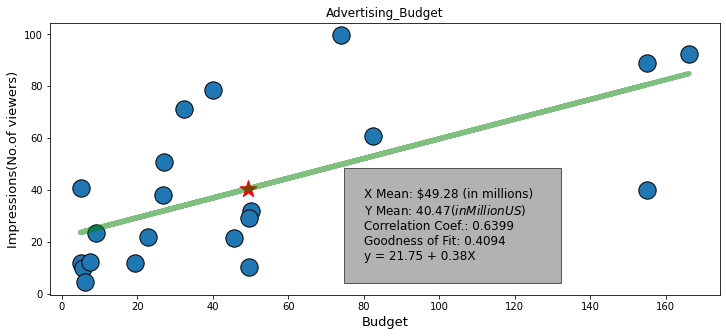

In [13]:
x=data['Budget'] # Independent variable or predictor.
y=data['Impressions'] # Dependent variable or outcome.
# split data into train and test sets
print('-----Shape of the train and test sets-----')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #Shape of the train and test sets

def linear_regression(x, y):  
#simple linear regression equation is: Y = Β0 + Β1X
   N=len(x)
   x_mean=x.mean() # Mean of x value
   y_mean=y.mean() # Mean of y value
   #To find B0 and B1 value using formula
   B1_num = ((x - x_mean) * (y - y_mean)).sum()
   B1_den = ((x - x_mean)**2).sum()
   B1 = B1_num / B1_den # B1
   B0 = y_mean - (B1*x_mean) # B0
   print('B0: ',B0) ## Β0 – is a constant (shows the value of Y when the value of X=0)
   print('B1: ',B1) ## Β1 – the regression coefficient (shows how much Y changes for each unit change in X)
   reg_line = 'y = {} + {}β'.format(B0, round(B1, 3)) # To show Regression Line using y=B0+B1X format
   return (B0, B1, reg_line)

# To find correlation coefficient using formula
N = len(x)
num = (N * (x*y).sum()) - (x.sum() * y.sum())
den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
R = num / den # Correlation coefficient

# Applying these functions to our data, we can print out the results:
B0, B1, reg_line=linear_regression(x,y)
print('"Regression Line:" ', reg_line)
print('"Correlation Coef.": ', R)
print('"Goodness of Fit": ', R**2)

# Plotting the Regression Line
plt.figure(figsize=(12,5)) # size of figure
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
# To show description about SLR figure
text = '''X Mean: ${} (in millions)  
Y Mean: ${} (in Million US$)
Correlation Coef.: {}
Goodness of Fit: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=80, y=13, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.6, 'pad': 20}) #To give text description format
plt.title('Advertising_Budget')
plt.xlabel('Budget', fontsize=13)
plt.ylabel('Impressions(No.of viewers)', fontsize=13)
plt.plot(x, B0 + B1*x, c = 'g', linewidth=5, alpha=.5, solid_capstyle='round') # For plottng linear line
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point


https://towardsdatascience.com/simple-linear-regression-in-python-numpy-only-130a988c0212

https://intellipaat.com/blog/what-is-linear-regression/